<a href="https://colab.research.google.com/github/KuntumallaJayashree/Consignment-Price/blob/main/Consignment_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

In [151]:
data = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

In [152]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [153]:
data.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [154]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

PQ First Sent to Client Date
PO Sent to Vendor Date      
Scheduled Delivery Date     
Delivered to Client Date    
Delivery Recorded Date      

Above mentioned columns are Dates but their type is object. Need to convert them to date type

In [156]:
data.shape

(10324, 33)

In [157]:
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


## EDA
1. Missing values
2. Explore about numerical variables
3. Explore about categorical variables
4. Find relationship between variables


###  Validating null values/Missing values

In [158]:
data.isnull().sum().sort_values(ascending=False)

Dosage                          1736
Shipment Mode                    360
Line Item Insurance (USD)        287
Molecule/Test Type                 0
Brand                              0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Vendor                             0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
Weight (Kilograms)                 0
Freight Cost (USD)                 0
Item Description                   0
ID                                 0
Project Code                       0
Product Group                      0
Delivery Recorded Date             0
Delivered to Client Date           0
Scheduled Delivery Date            0
PO Sent to Vendor Date             0
PQ First Sent to Client Date       0
Vendor INCO Term                   0
Fulfill Via                        0
M

Dosage,Shipment mode, and Line Item Insurance (USD) having null values

In [159]:
#list comprehenhn --
[features for features in data.columns if data[features].isnull().sum()>0]

['Shipment Mode', 'Dosage', 'Line Item Insurance (USD)']

<Axes: >

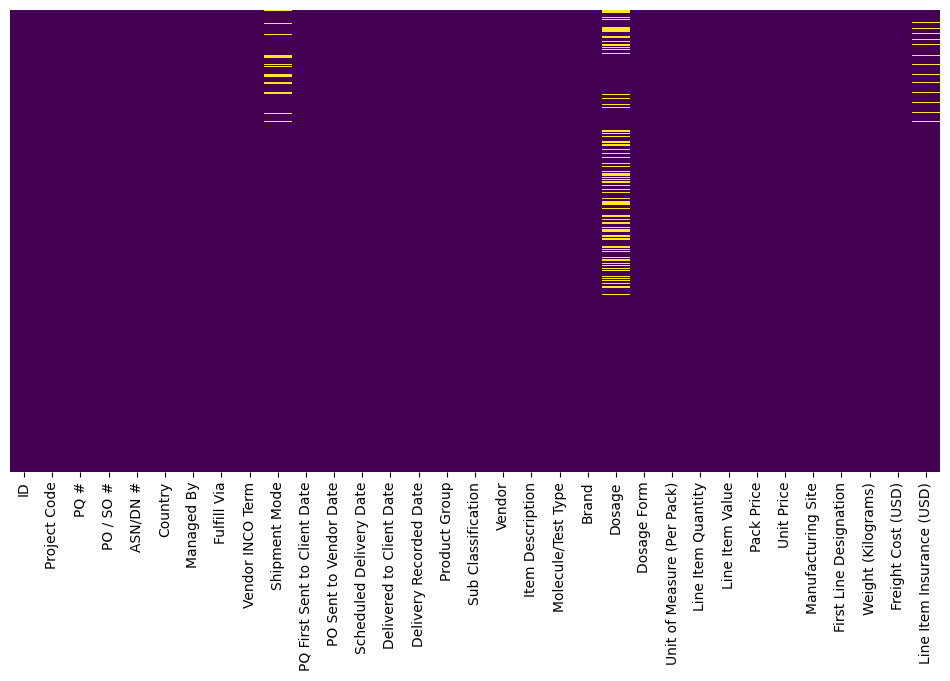

In [160]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [161]:
## Data types

data.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [162]:
data.Country.value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
A

In [163]:
country_names = data.Country.value_counts().index

In [164]:
country_values = data.Country.value_counts().values

In [165]:
len(country_names)

43

([<matplotlib.patches.Wedge at 0x79f58d6e4520>,
 [Text(0.984565805659108, 0.49054069589263627, 'South Africa'),
  Text(0.27619205605592795, 1.0647619208872936, 'Nigeria'),
  Text(-0.5223197509970665, 0.9680816482706212, "Côte d'Ivoire"),
  Text(-0.9837581341114553, 0.4921584435621808, 'Uganda'),
  Text(-1.0998135883140374, -0.020250208882896886, 'Vietnam'),
  Text(-0.9811557496134045, -0.4973262460403218, 'Zambia'),
  Text(-0.6759794064904789, -0.8677855967926524, 'Haiti'),
  Text(-0.2604103328818691, -1.0687312377433131, 'Mozambique'),
  Text(0.15927925502256962, -1.0884071475874528, 'Zimbabwe'),
  Text(0.5204091560960988, -0.9691100609586851, 'Tanzania'),
  Text(0.7927572200693814, -0.7625850706825217, 'Rwanda'),
  Text(0.9572349150864842, -0.5419421715823299, 'Congo, DRC'),
  Text(1.0414389493040714, -0.3541255637093033, 'Guyana'),
  Text(1.0824551326507048, -0.19568057082435486, 'Ethiopia'),
  Text(1.0984015734538932, -0.05927886161197627, 'South Sudan')],
 [Text(0.537035893995877,

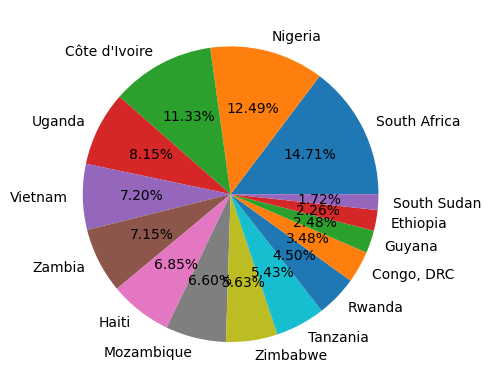

In [50]:
# drawing Pie chart
plt.pie(country_values[:15],labels=country_names[:15],autopct="%1.2f%%")

Observations:
1. Sounth Africa is the having maximum shipments, followed by Nigeria and citedIvoire.


In [166]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [167]:
pd.options.display.max_rows =1000

In [71]:
#df_group = data.groupby(["Pack Price",'Product Group','Sub Classification','Vendor']).size().reset_index().rename(columns={0:"Group"})

## Dropping ID as that wont add value to the analysis

In [72]:
data.drop(columns=['ID'],inplace=True)

In [168]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

## working on Numerical

In [169]:
num_features = []
cat_features = []

for i in data.columns:
  if data[i].dtypes == "object":
    cat_features.append(i)
  else:
    num_features.append(i)



In [170]:
num_features

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Line Item Insurance (USD)']

In [171]:
data.groupby('Pack Price','Line Item Quantity','Line Item Value','Line Item Insurance (USD)').size()

ValueError: No axis named Line Item Quantity for object type DataFrame

In [172]:
cat_features

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

Removing below features as those are date datatype

'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',


In [173]:
removed= ['PQ First Sent to Client Date', 'PO Sent to Vendor Date', 'Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']

In [174]:
for i in removed:
  cat_features.remove(i)

In [83]:
cat_features

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

In [175]:
num_features

['ID',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Line Item Insurance (USD)']

In [176]:
for i in num_features:
  print(i,data[i].isnull().sum())

ID 0
Unit of Measure (Per Pack) 0
Line Item Quantity 0
Line Item Value 0
Pack Price 0
Unit Price 0
Line Item Insurance (USD) 287


In [177]:
for i in num_features:
  print(i,data[i].value_counts(ascending=False))

ID 1        1
82565    1
82594    1
82595    1
82596    1
        ..
26571    1
26576    1
26590    1
26591    1
86823    1
Name: ID, Length: 10324, dtype: int64
Unit of Measure (Per Pack) 60      4121
30      2630
100      976
240      670
120      474
20       470
90       222
300      157
1        126
25       114
200       76
180       76
270       53
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: Unit of Measure (Per Pack), dtype: int64
Line Item Quantity 10000    93
1000     91
100      87
2000     73
5000     69
         ..
814       1
37680     1
3939      1
2607      1
36639     1
Name: Line Item Quantity, Length: 5065, dtype: int64
Line Item Value 200000.00    29
16000.00     23
800.00       18
0.00         17
14400.00     16
             ..
415552.08     1
561.46        1
438340.92    

In [178]:
data['Line Item Insurance (USD)'].unique()

array([    nan,  192.  ,  128.  , ..., 5284.04,  134.03,   85.82])

In [179]:
data['Line Item Insurance (USD)'].mean()

240.11762578459698

In [180]:
data['Line Item Insurance (USD)'].mode()

0    0.0
Name: Line Item Insurance (USD), dtype: float64

In [181]:
## Imputing missing values with mode values
data['Line Item Insurance (USD)'].fillna(data['Line Item Insurance (USD)'].mode()[0],inplace=True)

In [183]:
df =data.groupby(['Pack Price',"ID",'Line Item Quantity','Line Item Value','Line Item Insurance (USD)']).size().reset_index().rename({0:"Group"})

In [184]:
df

,Pack Price,ID,Line Item Quantity,Line Item Value,Line Item Insurance (USD),0
Group,0.00,10910,3119,0.00,0.00,1
1,0.00,12522,180,0.00,0.00,1
2,0.00,14079,2915,0.00,0.00,1
3,0.00,17135,3053,0.00,0.00,1
4,0.00,19405,3039,0.00,0.00,1
...,...,...,...,...,...,...
10319,1242.53,36083,45,55913.85,57.48,1
10320,1242.53,69591,80,99402.40,102.19,1
10321,1242.53,73056,80,99402.40,102.19,1
10322,1250.00,41282,31,38750.00,47.93,1


In [185]:
df[(df["Pack Price"]==0) & (df['Line Item Insurance (USD)']==0)]

,Pack Price,ID,Line Item Quantity,Line Item Value,Line Item Insurance (USD),0
Group,0.0,10910,3119,0.00,0.0,1
1,0.0,12522,180,0.00,0.0,1
2,0.0,14079,2915,0.00,0.0,1
3,0.0,17135,3053,0.00,0.0,1
4,0.0,19405,3039,0.00,0.0,1
5,0.0,24653,3029,0.00,0.0,1
6,0.0,47301,814,0.01,0.0,1
7,0.0,56899,2330,0.00,0.0,1
8,0.0,61493,112,0.00,0.0,1
9,0.0,65555,3015,0.00,0.0,1


In [186]:
df[(df["Pack Price"]==0) & (df['Line Item Value']==0)]

,Pack Price,ID,Line Item Quantity,Line Item Value,Line Item Insurance (USD),0
Group,0.0,10910,3119,0.0,0.0,1
1,0.0,12522,180,0.0,0.0,1
2,0.0,14079,2915,0.0,0.0,1
3,0.0,17135,3053,0.0,0.0,1
4,0.0,19405,3039,0.0,0.0,1
5,0.0,24653,3029,0.0,0.0,1
7,0.0,56899,2330,0.0,0.0,1
8,0.0,61493,112,0.0,0.0,1
9,0.0,65555,3015,0.0,0.0,1
10,0.0,67769,112,0.0,0.0,1


In [187]:
df[(df["Pack Price"]==0) & (df['Line Item Value']!=0)]

,Pack Price,ID,Line Item Quantity,Line Item Value,Line Item Insurance (USD),0
6,0.0,47301,814,0.01,0.0,1


Observations:
If there is line item insurance then packing price will be mandatory.


In [188]:
import matplotlib

In [189]:
matplotlib.rcParams['figure.figsize']=(12,6)

<Axes: xlabel='Pack Price', ylabel='Line Item Value'>

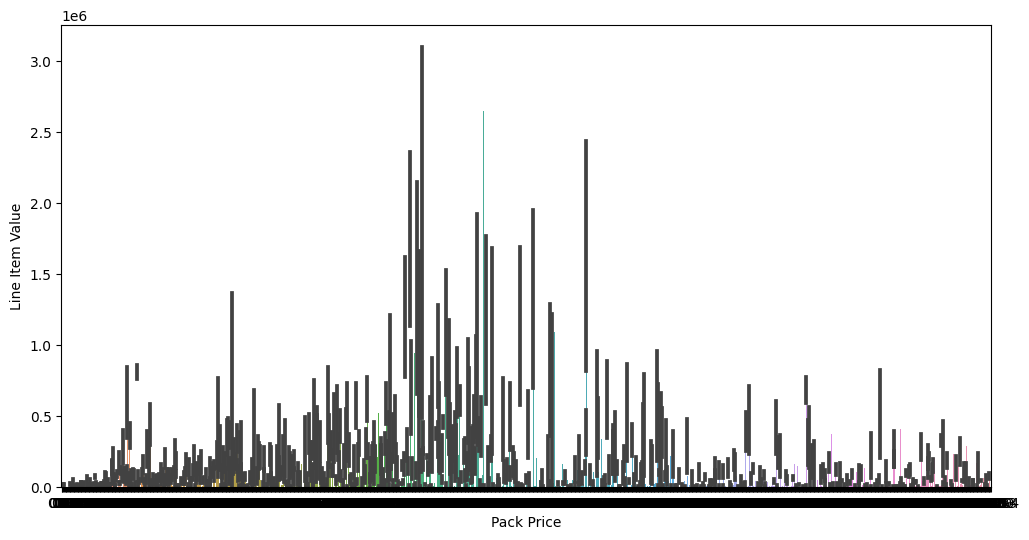

In [190]:
sns.barplot(x="Pack Price",y="Line Item Value",data=df)

<Axes: xlabel='Line Item Insurance (USD)', ylabel='Pack Price'>

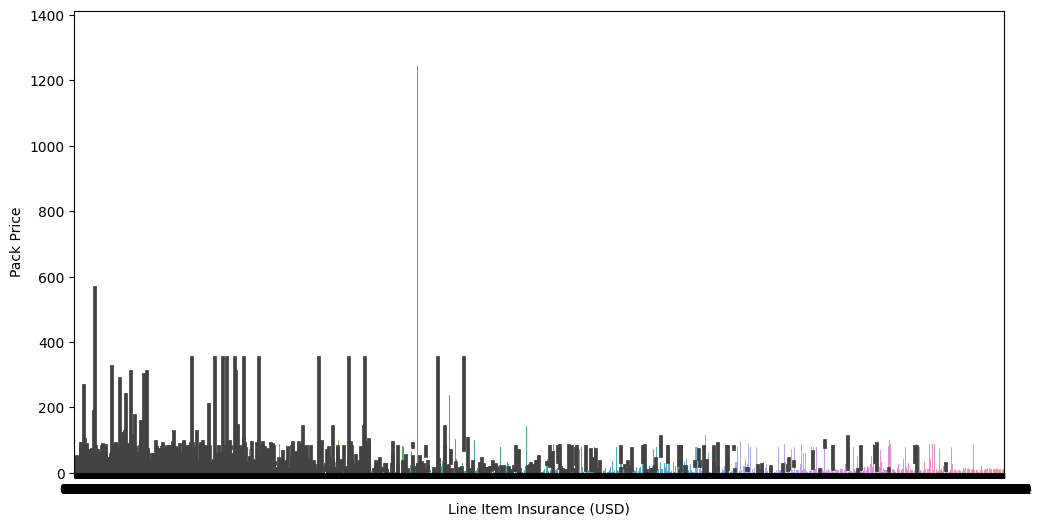

In [191]:
sns.barplot(y="Pack Price",x="Line Item Insurance (USD)",data=df)

Observations:
Maximum Pack price is above 1200USD


<Axes: xlabel='Line Item Quantity', ylabel='Pack Price'>

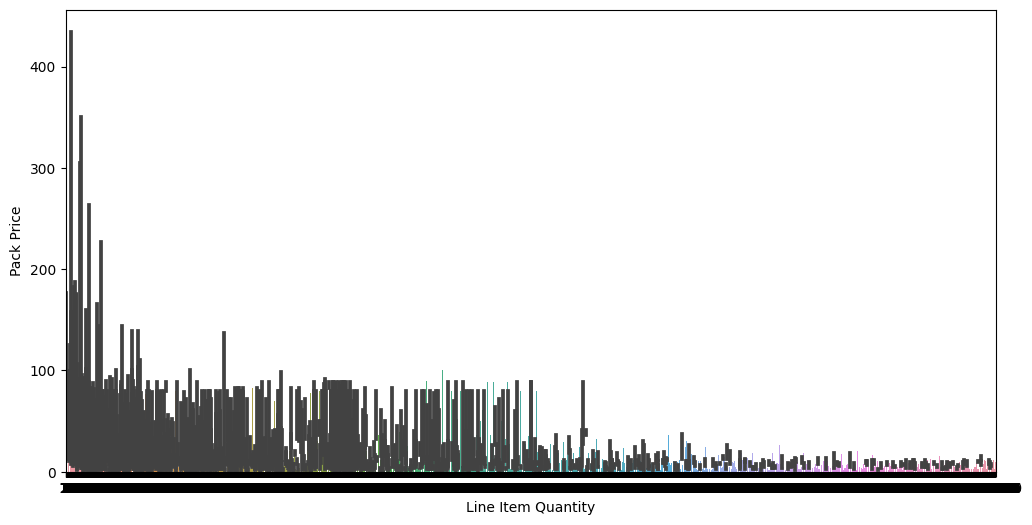

In [192]:
sns.barplot(y="Pack Price",x="Line Item Quantity",data=df)

Observations:
As quantity inncreases price also increase

In [193]:
cat_features

['Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)']

We need to convert the data type of below variables to numeric

'Weight (Kilograms)',
 'Freight Cost (USD)'

In [194]:
data['Weight (Kilograms)'] = pd.to_numeric(data['Weight (Kilograms)'])
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'])


ValueError: Unable to parse string "See ASN-93 (ID#:1281)" at position 8

In [150]:
#Treating of anamolis
data[data['Freight Cost (USD)'].str.contains("See")]
#data.query(Freight Cost (USD).str.contains("avs"))

#data[data['A'].str.contains("hello")]



,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
8,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",No,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),0.00
86,108-VN-T01,Pre-PQ Process,SCMS-37170,ASN-3562,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,21000,50400.00,2.40,0.04,"Aurobindo Unit III, India",No,See ASN-3562 (ID#:960),See ASN-3562 (ID#:960),98.78
94,106-HT-T01,Pre-PQ Process,SCMS-40000,ASN-3675,Haiti,PMO - US,Direct Drop,CIP,Air,Pre-PQ Process,...,200,32,402.88,12.59,0.06,"BMS Meymac, France",No,See ASN-3675 (ID#:1046),See ASN-3675 (ID#:1046),0.79
140,107-RW-T01,Pre-PQ Process,SCMS-268,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,30,71577,1087970.40,15.20,0.51,"Cipla, Goa, India",No,See ASN-242 (ID#:64),See ASN-242 (ID#:64),0.00
141,107-RW-T01,Pre-PQ Process,SCMS-268,ASN-242,Rwanda,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,...,60,5605,202340.50,36.10,0.60,"Cipla, Patalganga, India",No,See ASN-242 (ID#:64),See ASN-242 (ID#:64),0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10314,151-NG-T30,FPQ-14989,SO-51422,DN-4274,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,9/19/14,...,60,10340,37224.00,3.60,0.06,Mylan (formerly Matrix) Nashik,No,See DN-4274 (ID#:84472),See DN-4274 (ID#:84472),38.27
10317,151-NG-T30,FPQ-16313,SO-51440,DN-4282,Nigeria,PMO - US,From RDC,N/A - From RDC,Air,5/4/15,...,30,6724,20978.88,3.12,0.10,"Strides, Bangalore, India.",No,See DN-4282 (ID#:83919),See DN-4282 (ID#:83919),24.69
10318,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,...,60,205243,738874.80,3.60,0.06,"Cipla, Goa, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),869.66
10319,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/14,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79


In [ ]:
1.find asn
get the weight and f.c
update to particular


## Working on duplicates

In [ ]:
data.duplicated().sum()

4

In [ ]:
data[data.duplicated()]

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
1520,125-HT-T01,Pre-PQ Process,SO-1291,DN-686,Haiti,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,...,100,10,720.0,72.00,0.72,Inverness Japan,No,See DN-686 (ID#:10691),See DN-686 (ID#:10691),1.15
2135,100-ZW-T01,Pre-PQ Process,SO-710,DN-488,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,...,30,1860,23101.2,12.42,0.41,"Cipla, Goa, India",No,See DN-488 (ID#:10652),See DN-488 (ID#:10652),36.96
2577,100-ZW-T01,Pre-PQ Process,SO-716,DN-770,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Air,Pre-PQ Process,...,30,1860,23101.2,12.42,0.41,"Aurobindo Unit III, India",No,See DN-770 (ID#:10959),See DN-770 (ID#:10959),36.96
5781,105-SS-T30,FPQ-12623,SCMS-200920,ASN-21751,South Sudan,PMO - US,Direct Drop,EXW,Air,7/18/13,...,20,25,800.0,32.00,1.60,"Trinity Biotech, Plc",No,See ASN-21751 (ID#:13968),See ASN-21751 (ID#:13968),0.99


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0